# Gradient Descent Algorithm implementation on Himmelblau's and Ackley's functions

This Jupyter Notebook contains an implementation of a simple gradient descent algorithm, a foundational optimization method used to find the minimum of a given function. It's implementation is visualised on Himmelblau's and Ackley's funciton which both are great for testing the optimization algorithms. The algorithm iteratively adjusts its parameters to move towards the minimum of the function by following the negative gradient.

## Install dependencies

Create virtual environment, run the following cell once and comment it out.

In [3]:
%pip install matplotlib numpy pandas notebook

## 1. Function implemenation

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + 20 + np.e

## 2. Calculation of their gradient

In [6]:
def himmelblau_gradient(x):
    x1, x2 = x[0], x[1]
    df_dx = 4 * x1 * (x1**2 + x2 - 11) + 2 * (x1 + x2**2 - 7)
    df_dy = 2 * (x1**2 + x2 - 11) + 4 * x2 * (x1 + x2**2 - 7)
    return np.array([df_dx, df_dy])

def ackley_gradient(x):
    x1, x2 = x[0], x[1]
    common_part_1 = 2 * 2**(0.5) *np.sqrt(x1**2 + x2**2)**(-0.5) * np.exp(-np.sqrt(2 * (x1**2 + x2**2)) / 10)
    common_part_2 = np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)))
    df_dx = common_part_1 * x1 + np.pi * np.sin(2 * np.pi * x1) * common_part_2
    df_dy = common_part_1 * x2 + np.pi * np.sin(2 * np.pi * x2) * common_part_2
    return np.array([df_dx, df_dy])

## 3. Algorithm implemenation

### Simple gradient descend

In [7]:
def simple_gradient(gradient, x, learning_rate, err=0.00001, max_iter=10000):
    algorithm_path = [x]
    iterations = 0

    for i in range(max_iter):
        xnew = x - learning_rate * gradient(x)

        if np.linalg.norm(xnew - x) < err:
            break

        algorithm_path.append(xnew)
        x = xnew
        iterations = i
    
    return np.array(algorithm_path), iterations

### Gradient descend with momentum

This variant of algorithm uses momentum to escape local minimum which may be higher than some other minimum.

In [8]:
def simple_gradient(function, gradient, x, learning_rate, err=0.00001, max_iter=10000, v=0, beta=0.9):
    algorithm_path = [x]
    iterations = 0

    for i in range(max_iter):

        v = beta * v + (1 - beta) * gradient(x)

        xnew = x - learning_rate * v

        if np.linalg.norm(xnew - x) < err:
            break

        algorithm_path.append(xnew)
        x = xnew
        iterations = i
    
    return np.array(algorithm_path), iterations

### 3.1 Checking whether the algorithm works near known minimums

In [9]:
# Himmelblau function
algorithm_path, iterations = simple_gradient(himmelblau, himmelblau_gradient, np.array([3.1, 2.1]), 0.01)
print("Starting point:\t", algorithm_path[0])
print("Ending point:\t", algorithm_path[-1])
print("Iterations:\t", iterations)

Starting point:	 [3.1 2.1]
Ending point:	 [2.99972763 1.99998798]
Iterations:	 117


In [10]:
# Ackley function
algorithm_path, iterations = simple_gradient(ackley, ackley_gradient, np.array([0.1, 0.1]), 0.0001)
print("Starting point:\t", algorithm_path[0])
print("Ending point:\t", algorithm_path[-1])
print("Iterations:\t", iterations)

Starting point:	 [0.1 0.1]
Ending point:	 [0.00034165 0.00034165]
Iterations:	 635


## 4. Data visualisation functions implementation

### 4.1 Function for displaying 3D plots

In [11]:
def plot3d_function(function, color='plasma', x=np.linspace(-6, 6, 100), y=np.linspace(-6, 6, 100)):
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=color)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

### 4.2 Function for displaying contour plots with colorbar

In [12]:
def plot_contour(function, gradient, starting_points, learning_rate=0.01, v=0, depth=50, color='plasma', x=np.linspace(-6, 6, 100), y=np.linspace(-6, 6, 100)):
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, depth, cmap=color)
    plt.colorbar(contour)
    plt.xlabel('x')
    plt.ylabel('y')

    for starting_point in starting_points:
        plt.plot(starting_point[0], starting_point[1], 'ko', zorder=5)
        path = simple_gradient(function, gradient, starting_point, learning_rate, v=v)[0]
        plt.plot(path[:, 0], path[:, 1], color='black', zorder=5)
        plt.plot(path[-1, 0], path[-1, 1], 'r.', zorder=6)
    plt.show()

### 4.3 Function for displaying algorithm parameters in table

In [13]:
import pandas as pd

In [14]:
def display_parameters(function, gradient, starting_points, learning_rate=0.01, v=0):
    table = pd.DataFrame(starting_points, columns=['start_x', 'start_y'])

    iterations_table = []
    ending_x = []
    ending_y = []

    for starting_point in starting_points:
        path, iterations = simple_gradient(function, gradient, starting_point, learning_rate, v=v)
        iterations_table.append(iterations)
        ending_x.append(path[-1][0])
        ending_y.append(path[-1][1])

    table['iterations'] = np.array(iterations_table)
    table['end_x'] = np.array(ending_x)
    table['end_y'] = np.array(ending_y)
    
    return table

## 5. Testing the algorithm for multiple points with different `learning_rate` values

### 5.1 Himmelblau's function

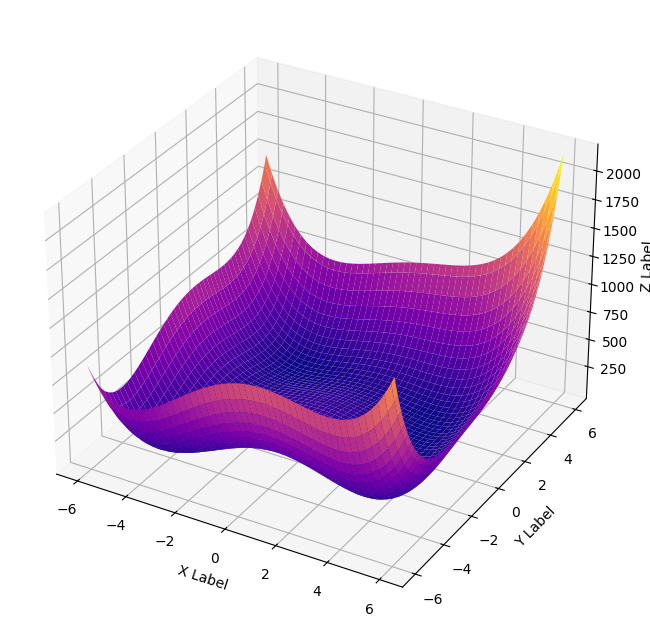

In [15]:
plot3d_function(himmelblau)

#### Creating starting points

In [16]:
np.random.seed(0)

starting_points = np.random.uniform(-5, 5, (30, 2))
starting_points[:5]

array([[ 0.48813504,  2.15189366],
       [ 1.02763376,  0.44883183],
       [-0.76345201,  1.45894113],
       [-0.62412789,  3.91773001],
       [ 4.63662761, -1.16558481]])

#### Visualisation for different `learning_rate`

#### `learning_rate=0.01`

In [17]:
learning_rate = 0.01

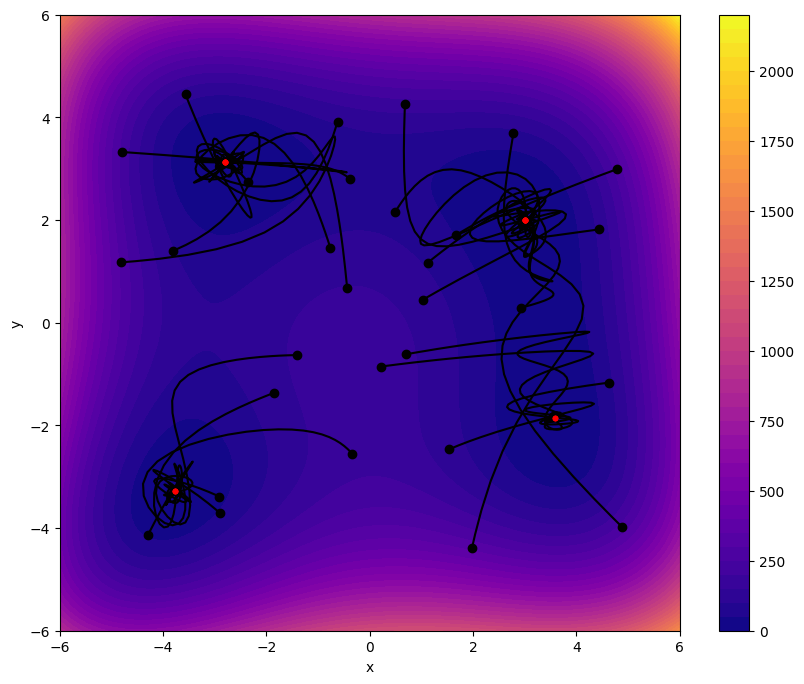

In [18]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=learning_rate, depth=50)

In [19]:
display_parameters(himmelblau, himmelblau_gradient, starting_points, learning_rate)

,start_x,start_y,iterations,end_x,end_y
0,0.488135,2.151894,173,3.000003,2.000317
1,1.027634,0.448832,186,3.000055,2.000095
2,-0.763452,1.458941,165,-2.805365,3.131528
3,-0.624128,3.917730,199,-2.805087,3.131331
4,4.636628,-1.165585,170,3.584588,-1.848158
5,2.917250,0.288949,160,2.999942,2.000432
6,0.680446,4.255966,193,3.000067,2.000051
7,-4.289639,-4.128707,150,-3.779118,-3.282871
8,-4.797816,3.326198,171,-2.804601,3.131263
9,2.781568,3.700121,168,2.999952,2.000409


#### `learning_rate=0.001`

In [20]:
learning_rate = 0.001

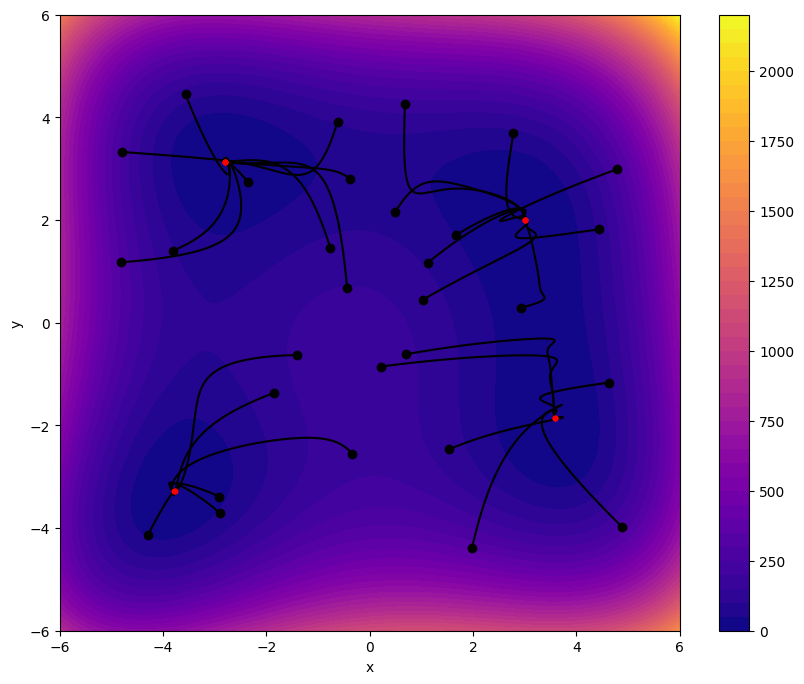

In [21]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=learning_rate, depth=50)

In [22]:
display_parameters(himmelblau, himmelblau_gradient, starting_points, learning_rate)

,start_x,start_y,iterations,end_x,end_y
0,0.488135,2.151894,249,2.999894,2.000187
1,1.027634,0.448832,258,3.000086,1.999788
2,-0.763452,1.458941,199,-2.805356,3.131273
3,-0.624128,3.917730,194,-2.805350,3.131313
4,4.636628,-1.165585,202,3.584442,-1.847986
5,2.917250,0.288949,377,3.000087,1.999790
6,0.680446,4.255966,254,2.999897,2.000187
7,-4.289639,-4.128707,130,-3.778838,-3.282344
8,-4.797816,3.326198,137,-2.803392,3.131130
9,2.781568,3.700121,184,3.000073,1.999800


#### `learning_rate=0.0001`

In [23]:
learning_rate = 0.0001

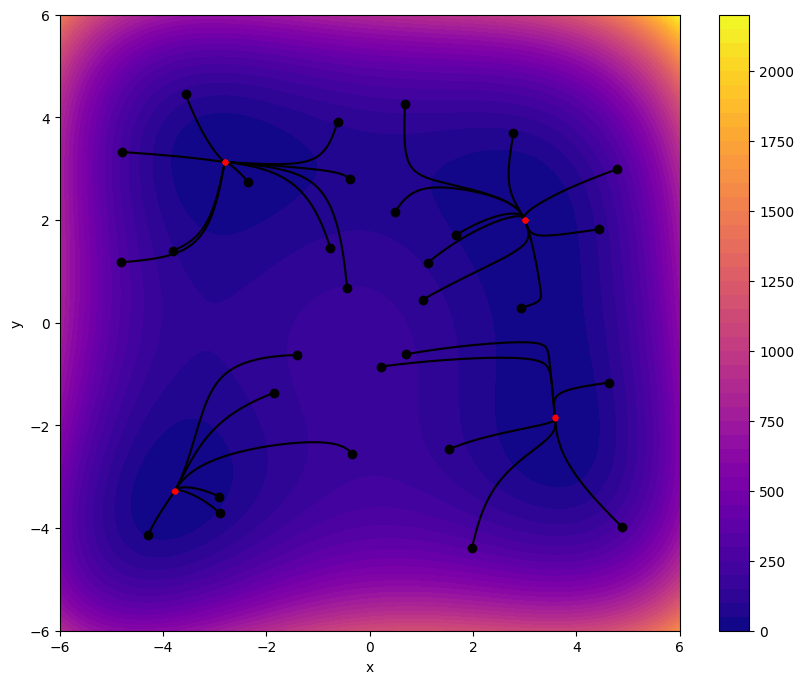

In [24]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=learning_rate, depth=50)

In [25]:
display_parameters(himmelblau, himmelblau_gradient, starting_points, learning_rate)

,start_x,start_y,iterations,end_x,end_y
0,0.488135,2.151894,2541,2.998549,2.003488
1,1.027634,0.448832,2411,3.001450,1.996484
2,-0.763452,1.458941,1446,-2.803687,3.131181
3,-0.624128,3.917730,1412,-2.803680,3.131201
4,4.636628,-1.165585,1959,3.584119,-1.844739
5,2.917250,0.288949,3491,3.001448,1.996491
6,0.680446,4.255966,2609,2.998549,2.003489
7,-4.289639,-4.128707,828,-3.780000,-3.284296
8,-4.797816,3.326198,925,-2.806551,3.131455
9,2.781568,3.700121,2012,2.998549,2.003489


#### `learning_rate=0.00001`

In [26]:
learning_rate = 0.00001

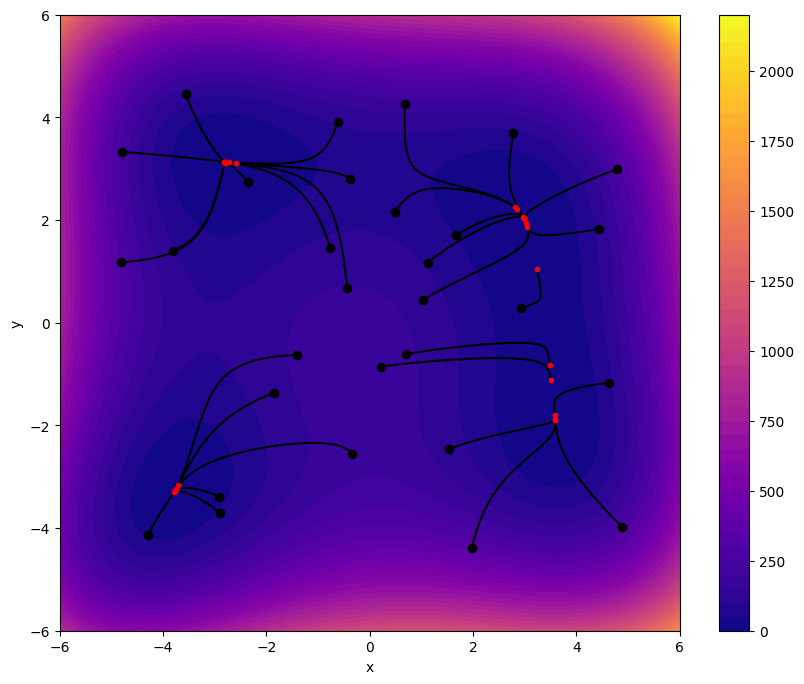

In [27]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=learning_rate, depth=50)

In [28]:
display_parameters(himmelblau, himmelblau_gradient, starting_points, learning_rate)

,start_x,start_y,iterations,end_x,end_y
0,0.488135,2.151894,9999,2.857662,2.208076
1,1.027634,0.448832,9999,3.048164,1.862984
2,-0.763452,1.458941,9999,-2.771264,3.127403
3,-0.624128,3.917730,9999,-2.777455,3.129431
4,4.636628,-1.165585,9999,3.579315,-1.791873
5,2.917250,0.288949,9999,3.239391,1.054425
6,0.680446,4.255966,9999,2.810755,2.250043
7,-4.289639,-4.128707,5527,-3.786736,-3.295014
8,-4.797816,3.326198,6326,-2.820230,3.132963
9,2.781568,3.700121,9999,2.975164,2.055621


### 5.2 Ackley's function

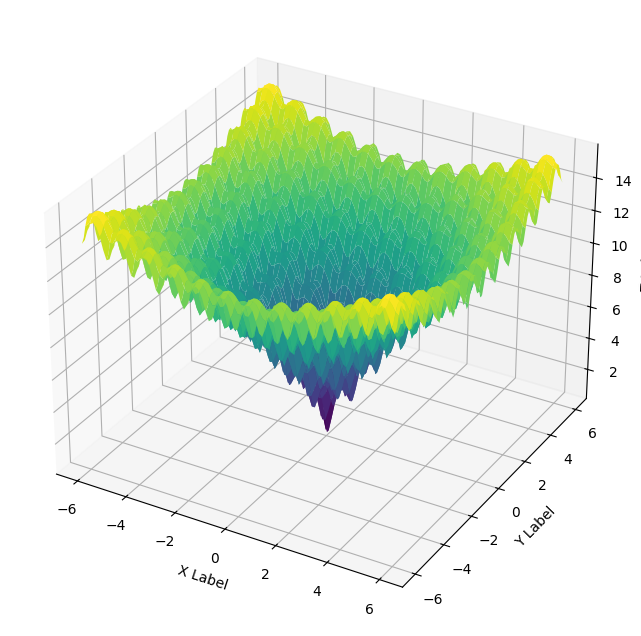

In [29]:
plot3d_function(ackley, color='viridis')

#### Creating starting points

In [30]:
np.random.seed(0)

starting_points = np.random.uniform(-5, 5, (100, 2))
starting_points[:5]

array([[ 0.48813504,  2.15189366],
       [ 1.02763376,  0.44883183],
       [-0.76345201,  1.45894113],
       [-0.62412789,  3.91773001],
       [ 4.63662761, -1.16558481]])

#### `learning_rate=0.1`

In [31]:
learning_rate = 0.1
v = 2

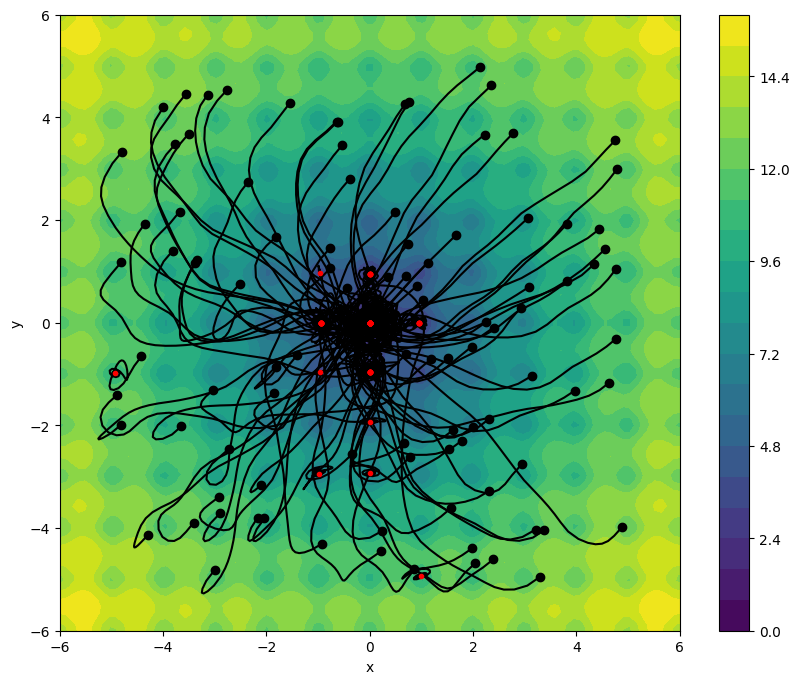

In [32]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=learning_rate, depth=20, color='viridis', v=v)

In [33]:
display_parameters(ackley, ackley_gradient, starting_points, learning_rate, v=v)

,start_x,start_y,iterations,end_x,end_y
0,0.488135,2.151894,177,-0.953381,0.000055
1,1.027634,0.448832,181,0.000037,-0.953396
2,-0.763452,1.458941,9999,0.000452,0.000165
3,-0.624128,3.917730,9999,-0.000481,-0.000015
4,4.636628,-1.165585,189,-0.953363,-0.000077
...,...,...,...,...,...
95,-1.017789,-2.901563,9999,0.000186,-0.000304
96,-3.138070,4.443724,9999,-0.000445,-0.000182
97,2.395508,-0.095412,9999,0.000322,-0.000152
98,-2.725854,-2.456435,208,0.953361,0.000014


#### `learning_rate=0.01`

In [34]:
learning_rate = 0.01

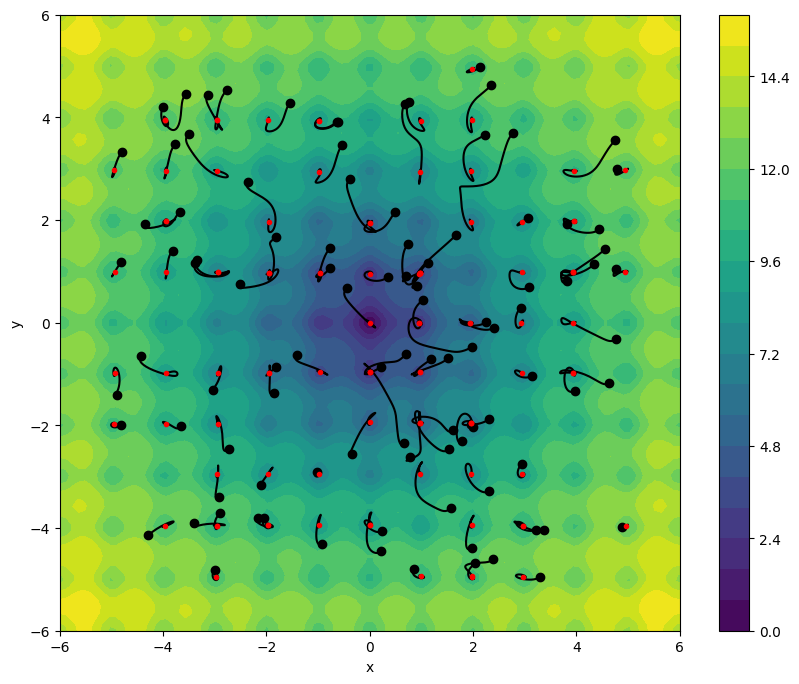

In [35]:
plot_contour(ackley, gradient=ackley_gradient, starting_points=starting_points, learning_rate=learning_rate, depth=20, color='viridis', v=2)

#### `learning_rate=0.001`

In [36]:
learning_rate = 0.001

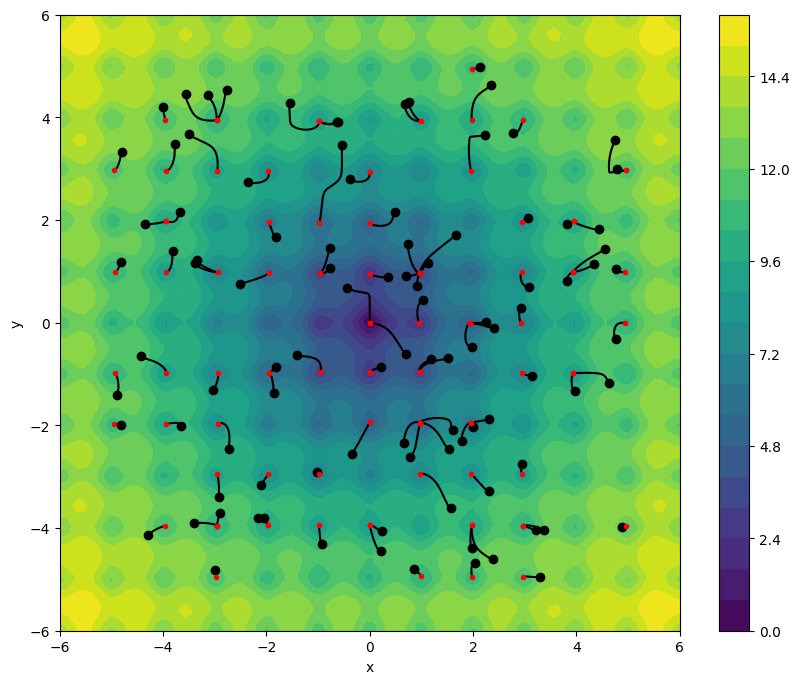

In [37]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=learning_rate, depth=20, color='viridis', v=2)

In [38]:
display_parameters(ackley, ackley_gradient, starting_points, learning_rate)

,start_x,start_y,iterations,end_x,end_y
0,0.488135,2.151894,270,0.000154,1.940944
1,1.027634,0.448832,201,0.953460,0.000314
2,-0.763452,1.458941,195,-0.962729,0.963135
3,-0.624128,3.917730,216,-0.984771,3.938174
4,4.636628,-1.165585,301,3.938225,-0.984827
...,...,...,...,...,...
95,-1.017789,-2.901563,113,-0.980319,-2.939558
96,-3.138070,4.443724,179,-2.963370,3.951084
97,2.395508,-0.095412,164,1.941099,-0.000056
98,-2.725854,-2.456435,292,-2.947028,-1.965075


#### `learning_rate=0.0001`

In [39]:
learning_rate = 0.0001

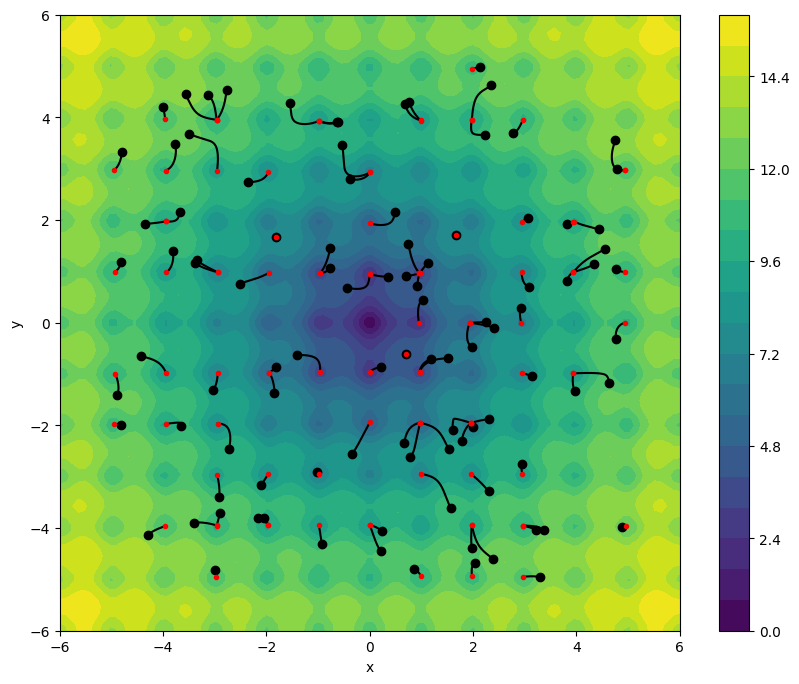

In [40]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=learning_rate, depth=20, color='viridis')

In [41]:
display_parameters(ackley, ackley_gradient, starting_points, learning_rate)

,start_x,start_y,iterations,end_x,end_y
0,0.488135,2.151894,2023,0.001541,1.939865
1,1.027634,0.448832,1557,0.952874,0.001660
2,-0.763452,1.458941,1552,-0.961667,0.964189
3,-0.624128,3.917730,1630,-0.983477,3.936571
4,4.636628,-1.165585,2491,3.940230,-0.984980
...,...,...,...,...,...
95,-1.017789,-2.901563,676,-0.981106,-2.937626
96,-3.138070,4.443724,1410,-2.963910,3.952861
97,2.395508,-0.095412,1272,1.942993,-0.000190
98,-2.725854,-2.456435,2235,-2.944907,-1.964751


## 6. Conclusion

The higher the `learnin_rate` parameter is the faster our model finds the approximation of closest minimmum. However if it is too large it can 'jump' over the minimmum and find another or even cause a runtime error. On the other hand if this parameter is too small the algorithm can hit the maximum iterations limit and in result will return some point which is not the minimum.